In [3]:
import scipy
import pandas as pd
import numpy as np
from scipy import stats

EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)
CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [4]:
#H0: mu = 13.2
#H1: mu<13.2

In [7]:
xbar = 12.2
S = 2.5
n = 40

In [21]:
#n>30, we use z-test
z_test = (xbar-13.2) / (S/np.sqrt(n))
z_test

-2.5298221281347035

In [23]:
#p-value
p_value = scipy.stats.norm.sf(abs(z_test))
p_value

0.005706018193000826

In [24]:
# Compare p-value and alpha
alpha = 0.01

if p_value < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?
CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [37]:
soil = pd.read_csv("Soil.csv")

In [38]:
soil

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [45]:
soil_new = soil.dropna()

In [46]:
soil_new

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [ ]:
#H0: mu1 = mu2
#H1: mu1 != mu2

In [47]:
#Levene test for equal variances
#H0: The population variances are equal
#H1: The population variances are NOT equal
#The small p-value suggests that the populations do not have equal variances.
leveneTest = stats.levene(soil_new.Soil1, soil_new.Soil2)
leveneTest

LeveneResult(statistic=0.2323198108973329, pvalue=0.631622932753579)

In [60]:
soil.Soil1.mean()

1.6918

In [61]:
soil.Soil2.mean()

1.4171142857142855

In [62]:
indTest = stats.ttest_ind(soil.Soil1, soil.Soil2, nan_policy="omit", equal_var=True)

In [63]:
indTest.statistic

5.1681473319343345

In [64]:
indTest.pvalue

2.5932287323528147e-06

In [65]:
alpha = 0.01

if indTest.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [68]:
pisa = pd.read_csv("2015_Pisa.csv")
pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [71]:
pisa.describe().T

,count,mean,std,min,25%,50%,75%,max
internet_users_per_100,70.0,71.973099,16.390632,21.976068,60.899020,72.99935,85.026763,98.2000
Math,70.0,460.971557,53.327205,327.702000,417.416075,477.60715,500.482925,564.1897
Reading,70.0,460.997291,49.502679,346.549000,426.948625,480.19985,499.687475,535.1002
Science,70.0,465.439093,48.397254,331.638800,425.923375,475.40005,502.431250,555.5747


In [72]:
pisa.groupby("Continent_Code").describe()

internet_users_per_100                                   \
                                count       mean        std        min   
Continent_Code                                                           
AF                                2.0  43.359918   7.297226  38.200000   
AS                               17.0  68.455613  21.086060  21.976068   
EU                               37.0  77.274888  12.425773  53.744979   
OC                                2.0  86.391704   2.589686  84.560519   
SA                                7.0  60.180494   9.772455  40.900000   

                                                            Math              \
                      25%        50%        75%        max count        mean   
Continent_Code                                                                 
AF              40.779959  43.359918  45.939877  48.519836   2.0  363.212100   
AS              50.300000  74.000000  84.948353  92.884826  17.0  466.216647   
EU              68.632900  76.184000  87.479056  98.200000  37.0  477.981449   
OC              85.476112  86.391704  87.307296  88.222889   2.0  494.559750   
SA              57.116462  64.289000  66.321532  69.198471   7.0  402.887700   

                ...     Reading           Science                         \
                ...         75%       max   count        mean        std   
Continent_Code  ...                                                        
AF              ...  358.256450  361.0555     2.0  381.074250   7.536556   
AS              ...  508.690500  535.1002    17.0  467.945847  56.671371   
EU              ...  499.814600  526.4247    37.0  478.299381  34.450616   
OC              ...  507.678175  509.2707     2.0  511.648700   2.340241   
SA              ...  431.922700  458.5709     7.0  421.747186  18.470319   

                                                                       
                     min         25%        50%         75%       max  
Continent_Code                                                         
AF              375.7451  378.409675  381.07425  383.738825  386.4034  
AS              386.4854  417.611200  456.48360  523.277400  555.5747  
EU              383.6824  460.774900  490.22500  501.936900  534.1937  
OC              509.9939  510.821300  511.64870  512.476100  513.3035  
SA              396.6836  408.205450  424.59050  433.794600  446.9561  

[5 rows x 32 columns]

In [86]:
EU_Math = pisa[pisa["Continent_Code"]=="EU"].Math.reset_index(drop=True)
EU_Math

0     413.1570
1     496.7423
2     506.9844
3     441.1899
4     521.2506
5     437.1443
6     492.3254
7     505.9713
8     511.0876
9     485.8432
10    519.5291
11    511.0769
12    492.9204
13    492.4785
14    453.6299
15    464.0401
16    476.8309
17    503.7220
18    488.0332
19    489.7287
20    478.3834
21    485.7706
22    482.3051
23    419.6635
24    371.3114
25    478.6448
26    417.9341
27    512.2528
28    501.7298
29    504.4693
30    491.6270
31    443.9543
32    494.0600
33    475.2301
34    509.9196
35    493.9181
36    420.4540
Name: Math, dtype: float64

In [87]:
AS_Math = pisa[pisa["Continent_Code"]=="AS"].Math.reset_index(drop=True)
AS_Math

0     427.4827
1     531.2961
2     403.8332
3     547.9310
4     386.1096
5     469.6695
6     380.2590
7     532.4399
8     459.8160
9     524.1062
10    396.2497
11    543.8078
12    446.1098
13    402.4007
14    564.1897
15    415.4638
16    494.5183
Name: Math, dtype: float64

In [88]:
indTest = stats.ttest_ind(EU_Math, AS_Math, equal_var=True)

In [89]:
indTest

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [91]:
alpha = 0.05

if indTest.pvalue < alpha:
    print("There is significant difference for Math scores among EU and Asian countries.")
else:
    print("Fail to reject the null")

Fail to reject the null


In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

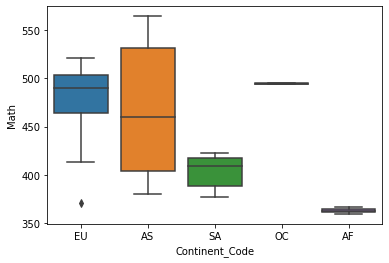

In [93]:
sns.boxplot(x=pisa.Continent_Code, y=pisa.Math);

ASSIGNMENT 4 Calculations